<a href="https://colab.research.google.com/github/monanjo123/dog-cat-classifier/blob/master/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


In [2]:
%ls /drive/

'My Drive'/


In [0]:
# imports
import keras
import os
import zipfile
import cv2
import numpy as np
import shutil
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import copy

In [0]:
# unzip dataset zip file
local_zip = '/drive/My Drive/Machine Learning/datasets/cat_vs_dogs_dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/drive/My Drive/Machine Learning/datasets/cat_vs_dog_dataset")
zip_ref.close()

In [6]:
# get filenames
path = '/drive/My Drive/Machine Learning/datasets/cat_vs_dog_dataset/datasets/catsvsdogs/images'

file_names = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

print(str(len(file_names)) + ' images loaded')

3002 images loaded


In [0]:
# create train and test dataset
def make_dir(directory):
  if os.path.exists(directory):
      shutil.rmtree(directory)
  os.makedirs(directory)

validation_data_dir = '/drive/My Drive/Machine Learning/datasets/cat_vs_dog_dataset/validation'
train_data_dir = '/drive/My Drive/Machine Learning/datasets/cat_vs_dog_dataset/train'

cat_train_dir = train_data_dir + '/cat'
dog_train_dir = train_data_dir + '/dog'
cat_validation_dir = validation_data_dir + '/cat'
dog_validation_dir = validation_data_dir + '/dog'

directories = [validation_data_dir , train_data_dir, cat_train_dir, dog_train_dir, cat_validation_dir, dog_validation_dir]

In [0]:
# create directories
for directory in directories:
  make_dir(directory)

# Preprocess Data


1.   Resize Image
2.   Create Validation Data
3.   Create Training Data



In [63]:
# Augment Data
src_path = '/drive/My Drive/Machine Learning/datasets/cat_vs_dog_dataset/datasets/catsvsdogs/images/'
data_gen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')
for i,file in enumerate(file_names):
  print('Adding Images')
  prefix = 'cat.'
  if file_names[i][0] == 'd':
    prefix = 'dog.'
  img = load_img(src_path+file)
  x = img_to_array(img)
  x = x.reshape((1,) + x.shape)
  i = 0
  for batch in data_gen.flow(x, save_to_dir=src_path, save_prefix=prefix, save_format='jpeg'):
    i += 1
    if i > 35:
      break
print('Done')

Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding Images
Adding

In [87]:
new_file_names = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

print(str(len(new_file_names)) + ' images loaded')

22924 images loaded


In [88]:
print(str(len(new_file_names)) + ' images loaded')

22924 images loaded


In [97]:
# create validation and train data
# 1000 train , 500 validation

img_size = (150, 150)
train_image_data = []
train_image_label = []
validation_image_data = []
validation_image_label = []
train_sample_size = int((len(new_file_names)/2 * 0.7))
validation_sample_size = int((len(new_file_names)/2 * 0.3))
dog_count = 0
cat_count = 0
print(train_sample_size, validation_sample_size)

for i,file in enumerate(new_file_names):
  # read image
  print(i)
  img = cv2.imread(src_path+file)
  img = cv2.resize(img, img_size, interpolation=cv2.INTER_AREA)
  if new_file_names[i][0] == 'd':
    if dog_count < train_sample_size:
#       print('dog count:', dog_count, 'train size:' ,train_sample_size)
#       cv2.imwrite(dog_train_dir + '/' + file, img)
      train_image_data.append(img)
      train_image_label.append(1)
    else:
#       cv2.imwrite(dog_validation_dir + '/' + file, img)
#       print('dog count:', dog_count, 'validation size:' ,validation_sample_size)
      validation_image_data.append(img)
      validation_image_label.append(1)
    dog_count += 1
  elif new_file_names[i][0] == 'c':
    if cat_count < train_sample_size:
#       print('cat count:', cat_count, 'train size:' ,train_sample_size)
#       cv2.imwrite(cat_train_dir + '/' + file, img)
      train_image_data.append(img)
      train_image_label.append(0)
    else:
#       print('cat count:', cat_count, 'validation size:' ,validation_sample_size)
#       cv2.imwrite(cat_validation_dir + '/' + file, img)
      validation_image_data.append(img)
      validation_image_label.append(0)
    cat_count += 1 
    
  if cat_count == train_sample_size + validation_sample_size and dog_count == train_sample_size + validation_sample_size:
    break
#   print(i, file)
  



8023 3438
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274


In [98]:
# check number of data

print('total training images:', len(train_image_data))
print('total training label:', len(train_image_label))
print('total validation images:', len(validation_image_data))
print('total validation label:', len(validation_image_label))

total training images: 16046
total training label: 16046
total validation images: 6878
total validation label: 6878


In [0]:
# Using numpy's savez function to store our loaded data as NPZ files

dataset_path = '/drive/My Drive/Machine Learning/datasets/cat_vs_dog_dataset'
np.savez('{}/training_data.npz'.format(dataset_path), np.array(train_image_data))
np.savez('{}/training_label.npz'.format(dataset_path), np.array(train_image_label))
np.savez('{}/validation_data.npz'.format(dataset_path), np.array(validation_image_data))
np.savez('{}/validation_label.npz'.format(dataset_path), np.array(validation_image_label))

In [102]:
def load_data(dataset_path):
  train_data = np.load('{}/training_data.npz'.format(dataset_path))['arr_0']
  train_label = np.load('{}/training_label.npz'.format(dataset_path))['arr_0']
  validation_data = np.load('{}/validation_data.npz'.format(dataset_path))['arr_0']
  validation_label = np.load('{}/validation_label.npz'.format(dataset_path))['arr_0']
  
  return (train_data, train_label), (validation_data, validation_label)


(x_train, y_train), (x_test, y_test) =  load_data(dataset_path)
test_image = copy.deepcopy(x_test)
# Reshape label data from (2000,) to (2000,1)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

# Change image type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data from (0 - 255) to ( 0 - 1 )
x_train /= 255
x_test /= 255
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16046, 150, 150, 3)
(16046, 1)
(6878, 150, 150, 3)
(6878, 1)


In [103]:
# Create CNN Model

batch_size = 16
epochs = 25

img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]
input_shape = (img_rows, img_cols, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_30 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_31 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 64)       

In [104]:
# Train Model
history = model.fit(x_train, 
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    shuffle=True
                   )
model.save('/drive/My Drive/Machine Learning/Models/cat_dog_classifier_data_augmented.h5')

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 16046 samples, validate on 6878 samples
Epoch 1/25
16046/16046 [==============================] - 30s 2ms/step - loss: 0.6462 - acc: 0.6316 - val_loss: 0.6457 - val_acc: 0.6322
Epoch 2/25
16046/16046 [==============================] - 28s 2ms/step - loss: 0.5677 - acc: 0.7204 - val_loss: 0.5205 - val_acc: 0.7569
Epoch 3/25
16046/16046 [==============================] - 28s 2ms/step - loss: 0.5325 - acc: 0.7485 - val_loss: 0.5633 - val_acc: 0.7360
Epoch 4/25
16046/16046 [==============================] - 28s 2ms/step - loss: 0.5184 - acc: 0.7617 - val_loss: 0.5154 - val_acc: 0.7573
Epoch 5/25
16046/16046 [==============================] - 27s 2ms/step - loss: 0.5048 - acc: 0.7708 - val_loss: 0.5112 - val_acc: 0.7514
Epoch 6/25
16046/16046 [==============================] - 28s 2ms/step - loss: 0.5094 - acc: 0.7708 - val_loss: 0.4749 - val_acc: 0.7876
Epoch 7/25
16046/16046 [==============================] - 29s 2ms/step - loss: 0.5021 - acc: 0.7778 - val_loss: 0.4882 - val_acc:

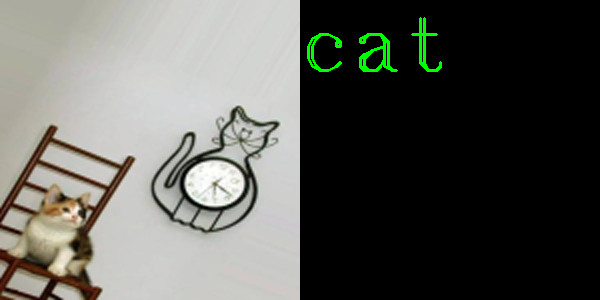

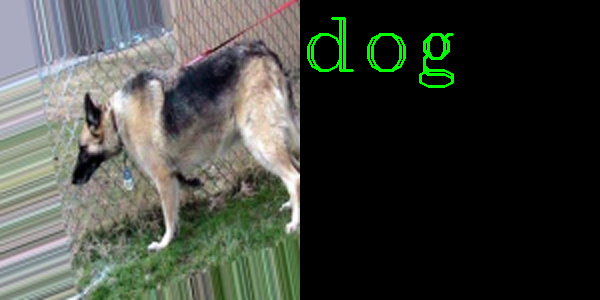

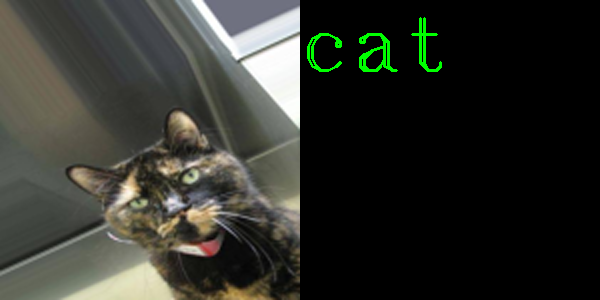

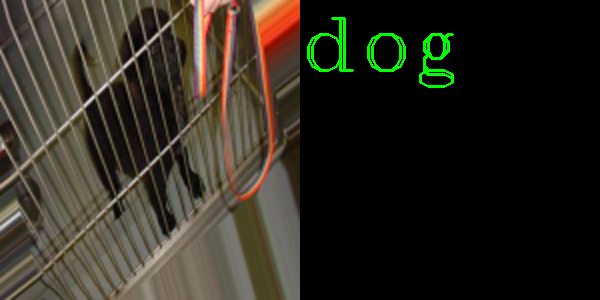

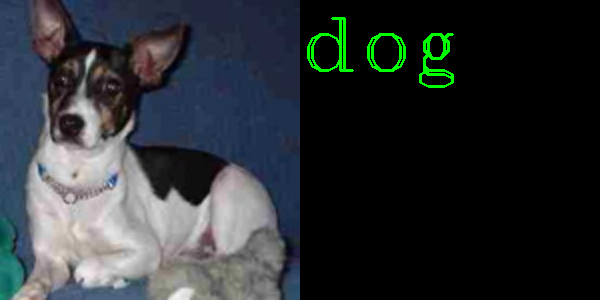

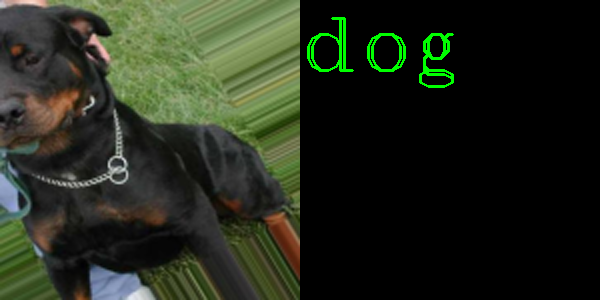

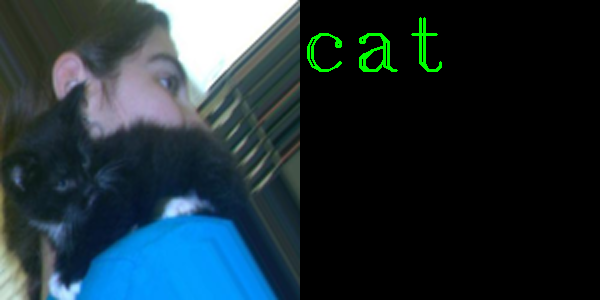

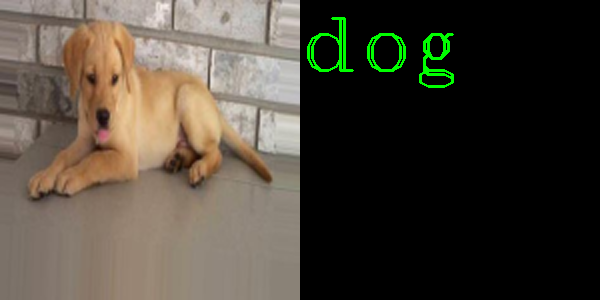

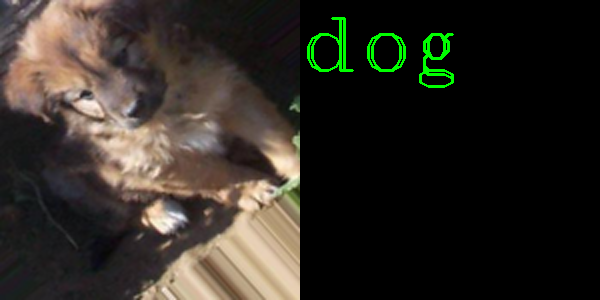

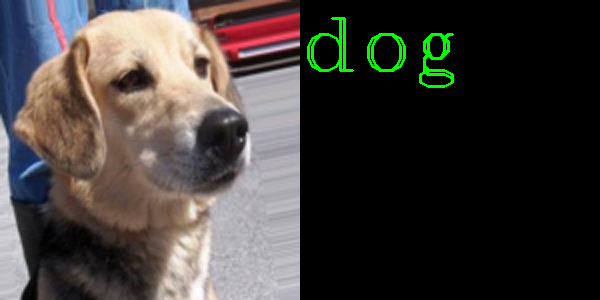

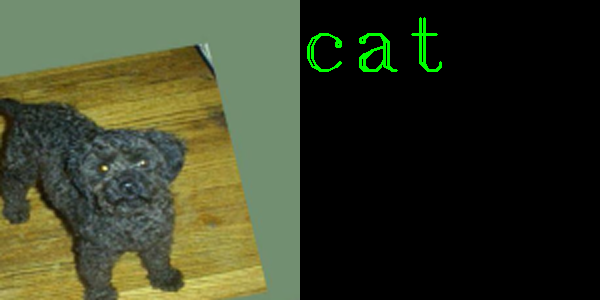

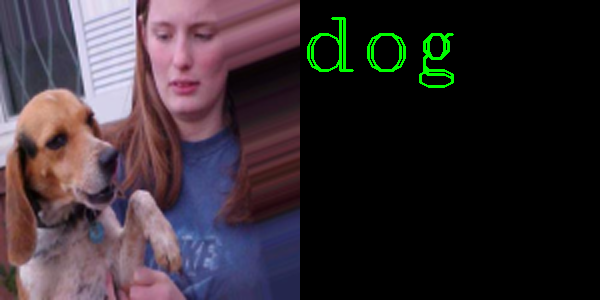

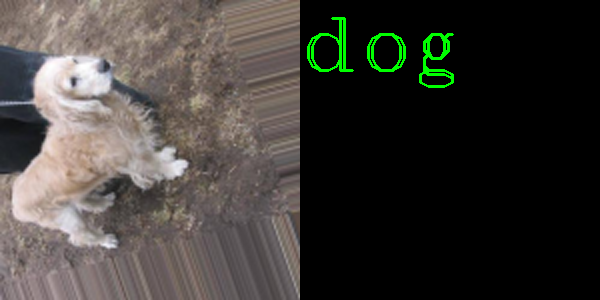

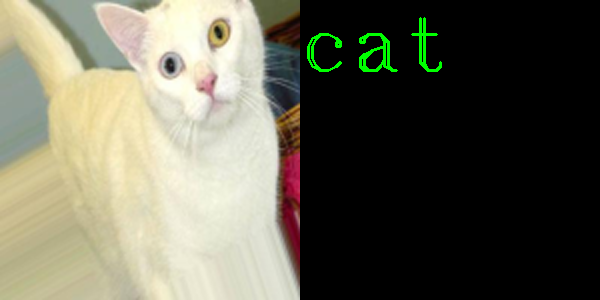

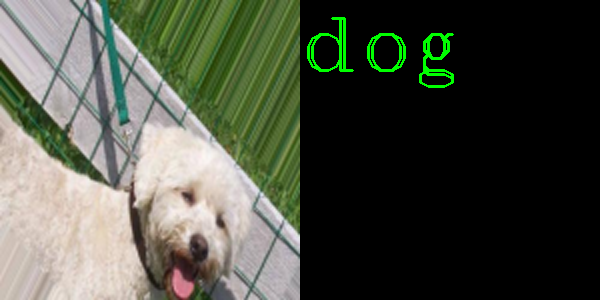

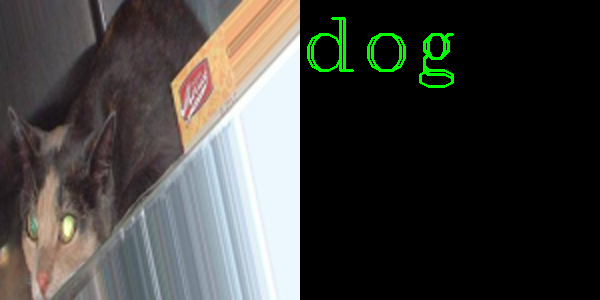

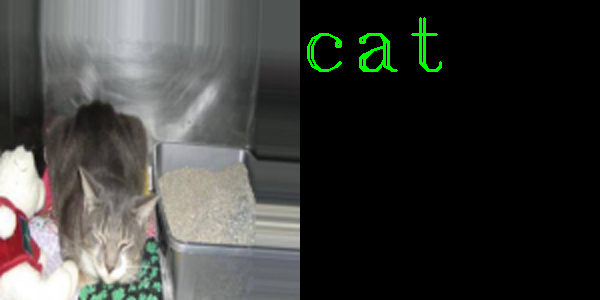

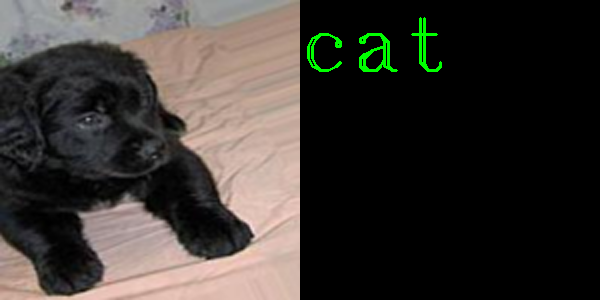

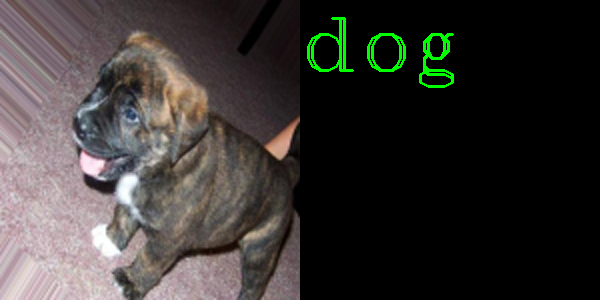

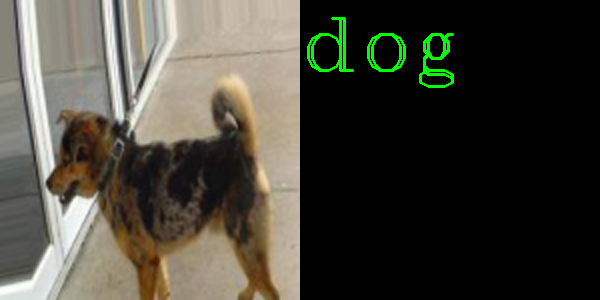

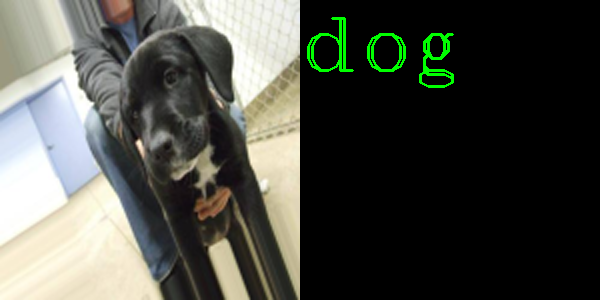

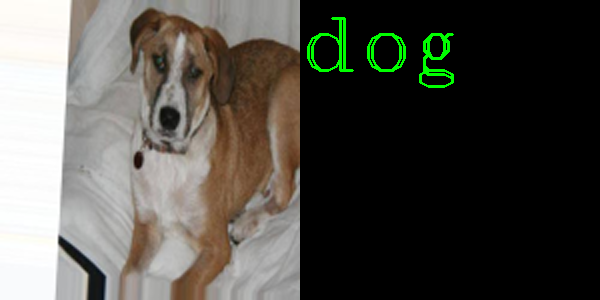

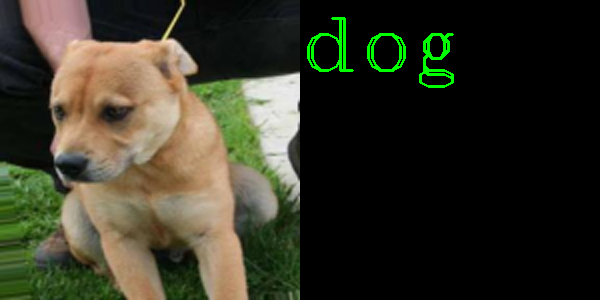

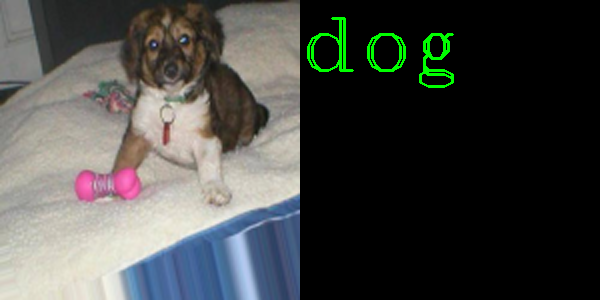

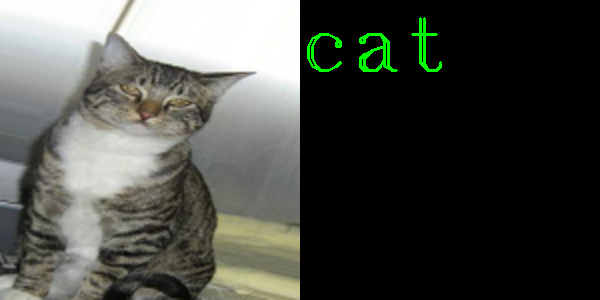

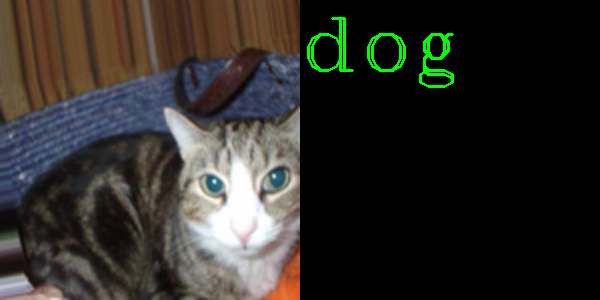

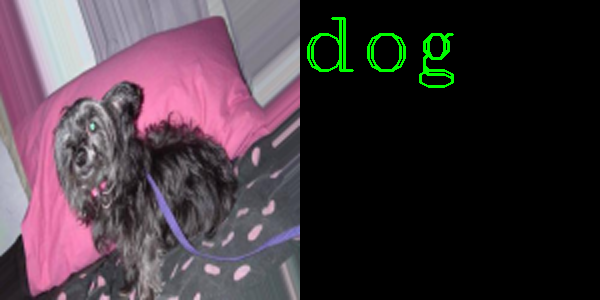

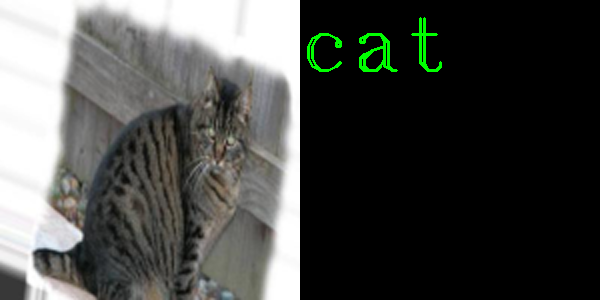

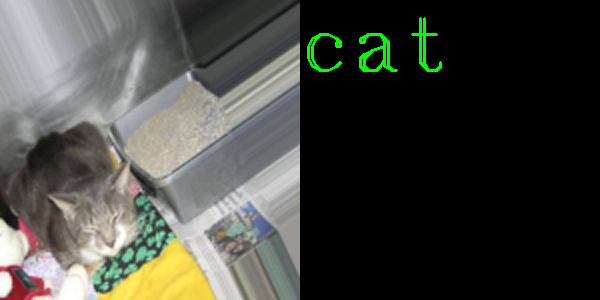

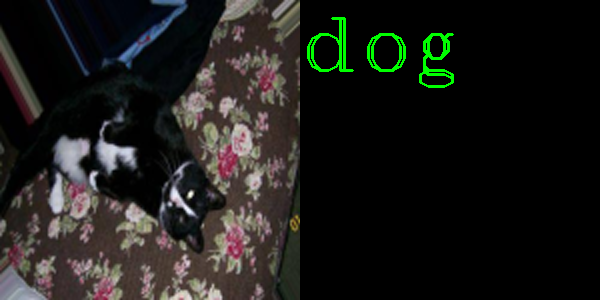

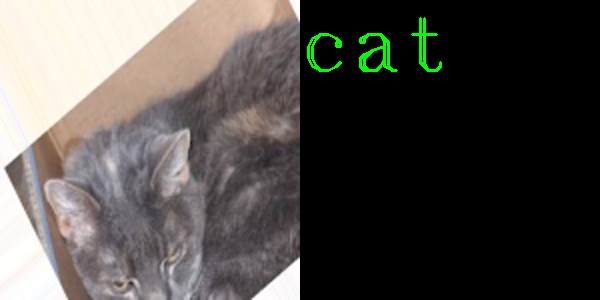

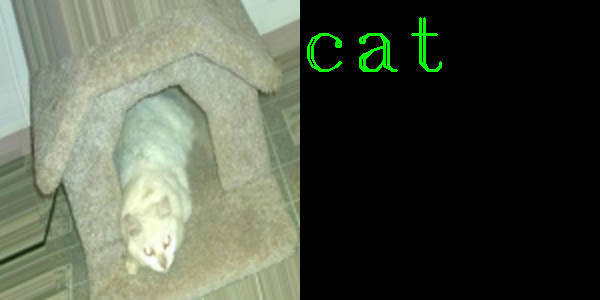

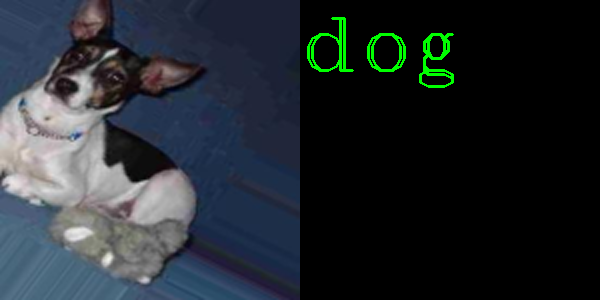

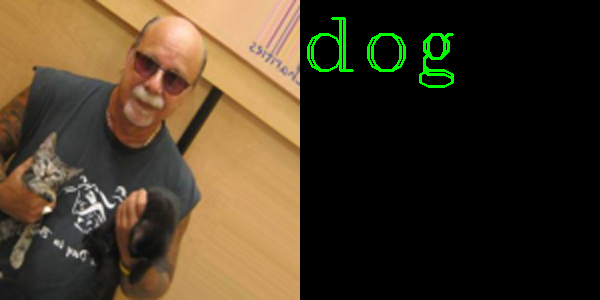

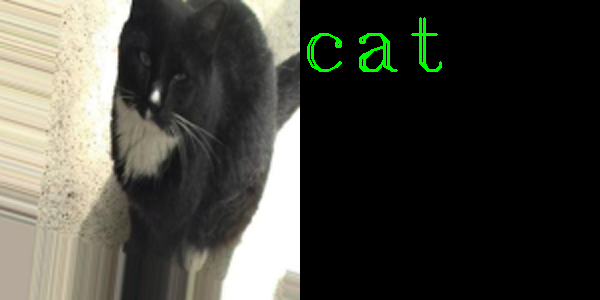

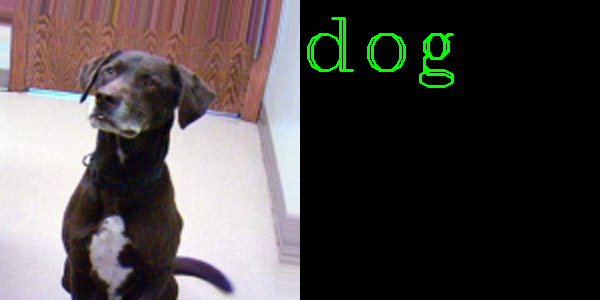

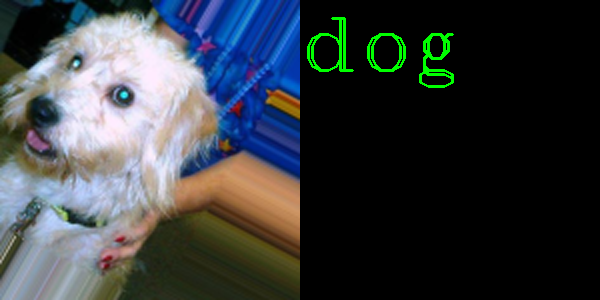

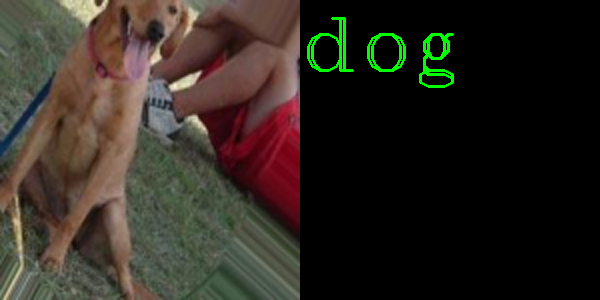

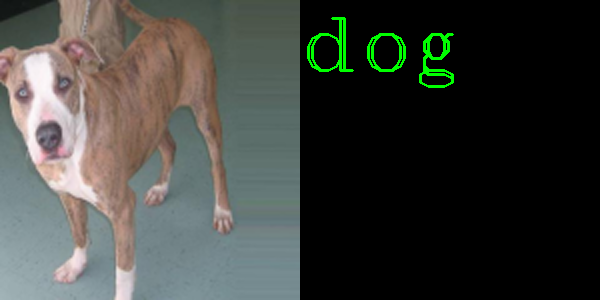

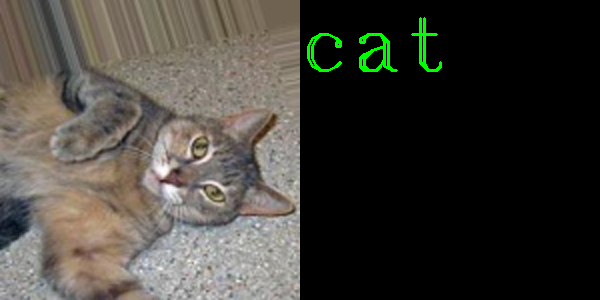

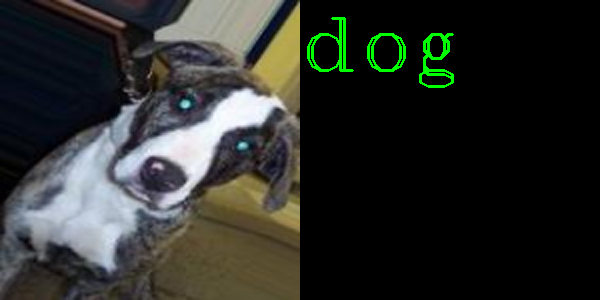

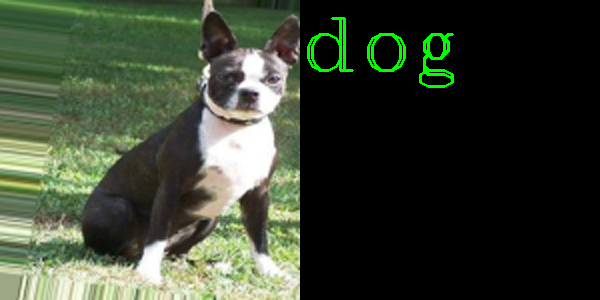

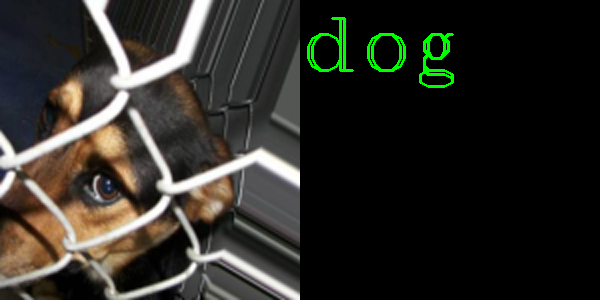

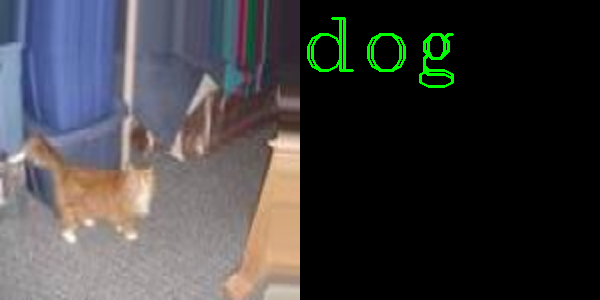

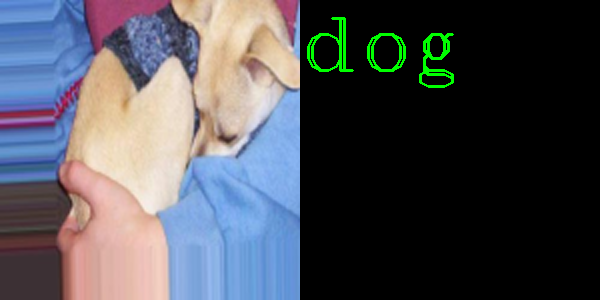

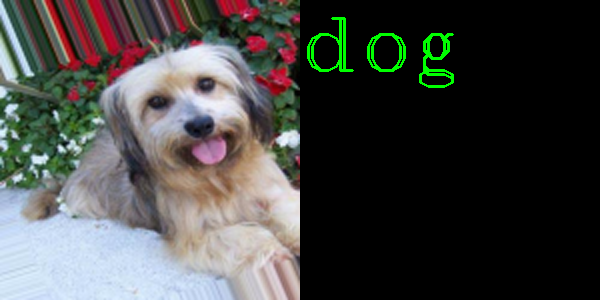

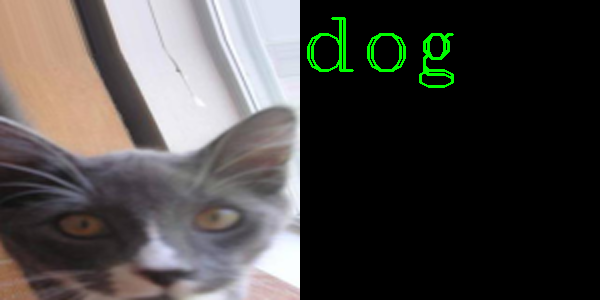

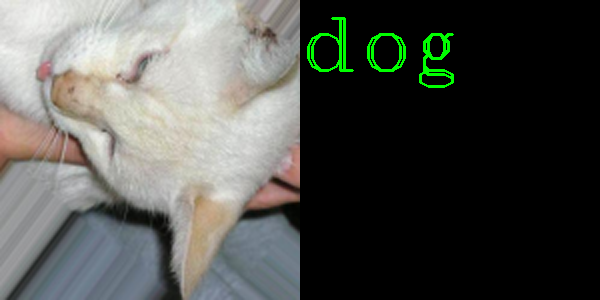

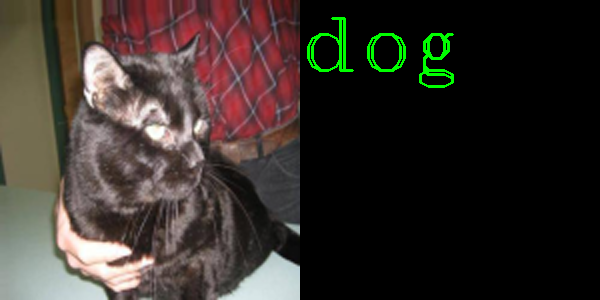

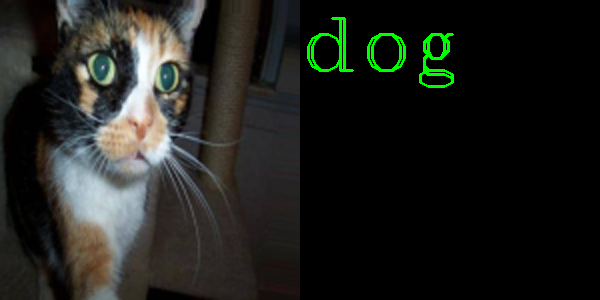

In [105]:
# Test Model

classifier = load_model('/drive/My Drive/Machine Learning/Models/cat_dog_classifier_data_augmented.h5')
def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    if pred == '[0]':
      pred = 'cat'
    elif pred == '[1]':
      pred = 'dog'
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, input_im.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
#     expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (300, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2_imshow(expanded_image)


for i in range(0,50):
    rand = np.random.randint(0,len(x_test))
    input_im = test_image[rand]

    imageL = cv2.resize(input_im, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
#     cv2_imshow(imageL)
    input_im = input_im.reshape(1,150,150,3)

    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)